In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy
%matplotlib inline

In [2]:
class phenomena:
    """A class to describe the scale of a phenomena"""
    def __init__(self, label, horz_range, vert_range, time_range):
        self.label = label
        self.horz_range = horz_range
        self.vert_range = vert_range
        self.time_range = time_range
    def __str__(self):
        return '%40s: H(%.0e:%.0e) V(%.0e:%.0e) T(%.0e:%.0e)'%(
        self.label,
        self.horz_range[0], self.horz_range[1],
        self.vert_range[0], self.vert_range[1],
        self.time_range[0], self.time_range[1])
    def pcoords(self, orient=('h','v'), log=False):
        if orient[0]=='h': horz_range = self.horz_range
        elif orient[0]=='v': horz_range = self.vert_range
        elif orient[0]=='t': horz_range = self.time_range
        else: raise Exception('1st element of orient is not h, v or t')
        if orient[1]=='h': vert_range = self.horz_range
        elif orient[1]=='v': vert_range = self.vert_range
        elif orient[1]=='t': vert_range = self.time_range
        else: raise Exception('2nd element of orient is not h, v or t')
        x0,x1,y0,y1 = horz_range[0],horz_range[1],vert_range[0],vert_range[1]
        if log: return numpy.log10(x0),numpy.log10(x1),numpy.log10(y0),numpy.log10(y1)
        return x0,x1,y0,y1
    def rect(self, orient=('h','v'), log=False):
        x0,x1,y0,y1 = self.pcoords(orient=orient, log=log)
        return mpl.patches.Rectangle( (x0,y0), x1-x0, y1-y0)
    def ellipse(self, orient=('h','v'), log=False, **kw):
        x0,x1,y0,y1 = self.pcoords(orient=orient, log=log)
        return mpl.patches.Ellipse( ((x0+x1)/2,(y0+y1)/2), x1-x0, y1-y0, **kw)
    def text(self, orient=('h','v'), log=False, fontsize=12):
        x0,x1,y0,y1 = self.pcoords(orient=orient, log=log)
        if log: tx,ty = (x0+x1)/2, (y0+y1)/2
        else: tx,ty = numpy.exp( ( numpy.log(x0) + numpy.log(x1) )/2 ),numpy.exp( ( numpy.log(y0) + numpy.log(y1) )/2 )
        plt.text( tx, ty, self.label, fontsize=fontsize,
            horizontalalignment='center', verticalalignment='center', clip_on=True)
    def plot(self, ax):
        ax.add_patch( self.rect() );
        self.text()

In [3]:
# These variable provide a convenient way to specify scales in different units
# e.g. For 2 weeks, instead of writing "2*7*86400" use "2*wk" 
um, mm, cm, m, km = 1e-6, 1e-3, 1e-2, 1, 1e3
ms, s, mn, hr, dy, wk, mo, yr = 1e-3, 1, 60, 3600, 86400, 86400*7, 30*86400, 365*86400

# Most plots need these annotations
def annotate(shortest=1*um, longest=10000*km, fastest=1*ms, slowest=1000*yr):
    lsh,llo,lfa,lsl = numpy.log10(shortest), numpy.log10(longest), numpy.log10(fastest), numpy.log10(slowest)
    plt.xlabel('Length scale', fontsize=14); plt.ylabel('Time scale', fontsize=14);
    x0,y1,y2 = lsh + 0.01 * ( llo - lsh ), lfa + 0.12 * ( lsl - lfa), lfa + 0.95 * ( lsl - lfa)
    plt.text(x0, y2, 'Slow', rotation=90, fontsize=18, color='grey');
    plt.text(x0, y1, 'Fast', rotation=90, fontsize=18, color='grey');
    y0,x1,x2 = lfa + 0.015 * ( lsl - lfa), lsh + 0.05 * ( llo - lsh ), lsh + 0.9 * ( llo - lsh )
    plt.text(x1, y0, 'Short', fontsize=18, color='grey');
    plt.text(x2, y0, 'Long', fontsize=18, color='grey');
    plt.xlim(lsh,llo); plt.ylim(lfa,lsl);

In [4]:
ocean = {}
ocean['kolmogorov']        = phenomena('Kolmogorov',
                                       (100*um,2*mm),(100*um,2*mm),(10*ms,10*s))
ocean['spray and bubbles'] = phenomena('Spray and bubbles',
                                       (10*um,1*mm),(10*um,1*mm),(100*ms,10*s))
ocean['capillary']         = phenomena('Capillary waves',
                                       (1*mm,10*cm),(0.1*mm,1*cm),(100*ms,20*s))
ocean['double diffusion']  = phenomena('Double diffusion and salt fingering',
                                       (1*mm,10*cm),(1*mm,10*m),(1*mn,1*hr))
ocean['biology']           = phenomena('Biologically generated turbulence',
                                       (1*cm,10*m),(1*cm,10*m),(0.2*s,10*s))
ocean['boundry turbulence']= phenomena('Vertical turbulence',
                                       (1*cm,10*m),(1*cm,10*m),(0.1*s,1*hr))
ocean['wind waves']        = phenomena('Wind waves',
                                       (1*cm,50*m),(2*mm,10*m),(1*s,2*mn))
ocean['swell']             = phenomena('Swell',
                                       (10*m,1*km),(2*m,200*m),(1*mn,1*dy))
ocean['langmuir']          = phenomena('Langmuir turbulence',
                                       (10*m,200*m),(10*m,200*m),(30*s,6*hr))
ocean['convection']        = phenomena('Deep convection',
                                       (1*m,500*m),(1*m,5*km),(5*mn,1*dy))
ocean['sub-mesoscale']     = phenomena('Sub-mesoscale',
                                       (200*m,5*km),(1*m,200*m),(2*hr,2*dy))
ocean['upwelling']         = phenomena('Boundary upwelling',
                                       (2*km,30*km),(10*m,500*m),(3*dy,1*yr))
ocean['internal tides']    = phenomena('Internal tides',
                                       (200*m,50*km),(10*m,5*km),(6*hr,2*dy))
ocean['mesoscale']         = phenomena('Mesoscale eddies',
                                       (2*km,90*km),(100*m,2*km),(12*hr,6*mo))
ocean['barotropic']        = phenomena('Barotropic eddies',
                                       (20*km,100*km),(100*m,5*km),(3*dy,6*mo))
ocean['tropical']          = phenomena('Tropical waves',
                                       (50*km,200*km),(50*m,500*m),(1*wk,1*yr))
ocean['western']           = phenomena('Boundary Currents',
                                       (20*km,150*km),(500*m,1*km),(1*mo,7*yr))
ocean['basin tide']        = phenomena('Tides',
                                       (50*km,5000*km),(500*m,5*km),(12*hr,2*dy))
ocean['rossby']            = phenomena('Rossby waves',
                                       (50*km,5000*km),(200*m,2*km),(1*wk,20*yr))
ocean['gyres']             = phenomena('Gyres',
                                       (500*km,5000*km),(500*m,5*km),(2*yr,50*yr))
ocean['seasons']           = phenomena('Seasonal cycle',
                                       (100*km,5000*km),(50*m,5*km),(0.8*yr,1.2*yr))
ocean['nino']              = phenomena('El Niño',
                                       (100*km,5000*km),(50*m,2*km),(1*yr,10*yr))
ocean['climate']           = phenomena('Climate change',
                                       (100*km,5000*km),(50*m,5*km),(3*yr,500*yr))
for k in ocean: print(ocean[k])

                              Kolmogorov: H(1e-04:2e-03) V(1e-04:2e-03) T(1e-02:1e+01)
                       Spray and bubbles: H(1e-05:1e-03) V(1e-05:1e-03) T(1e-01:1e+01)
                         Capillary waves: H(1e-03:1e-01) V(1e-04:1e-02) T(1e-01:2e+01)
     Double diffusion and salt fingering: H(1e-03:1e-01) V(1e-03:1e+01) T(6e+01:4e+03)
       Biologically generated turbulence: H(1e-02:1e+01) V(1e-02:1e+01) T(2e-01:1e+01)
                     Vertical turbulence: H(1e-02:1e+01) V(1e-02:1e+01) T(1e-01:4e+03)
                              Wind waves: H(1e-02:5e+01) V(2e-03:1e+01) T(1e+00:1e+02)
                                   Swell: H(1e+01:1e+03) V(2e+00:2e+02) T(6e+01:9e+04)
                     Langmuir turbulence: H(1e+01:2e+02) V(1e+01:2e+02) T(3e+01:2e+04)
                         Deep convection: H(1e+00:5e+02) V(1e+00:5e+03) T(3e+02:9e+04)
                           Sub-mesoscale: H(2e+02:5e+03) V(1e+00:2e+02) T(7e+03:2e+05)
                      Boundary upwelling: H

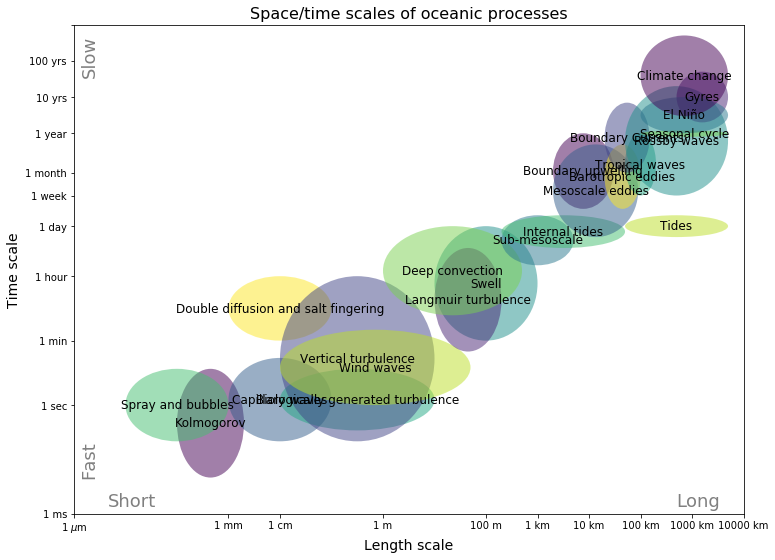

In [5]:
plt.figure(figsize=(12,9))
ax = plt.gca()
xor,yor = 'h','t'; orient=(xor,yor);
patches = []
for k in ocean:
    patches.append( ocean[k].ellipse(orient=orient, log=True) )
p = mpl.collections.PatchCollection( patches, alpha=0.5)
p.set_array( numpy.mod( numpy.arange( len(patches) ), 11/7 ) )
ax.add_collection( p )
for k in ocean:
    ocean[k].text(orient=orient, log=True)
if xor=='h': plt.xticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 100*m, 1*km, 10*km, 100*km, 1000*km, 1e4*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','100 m','1 km','10 km','100 km','1000 km','10000 km'] )
if yor=='v': plt.yticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 1*km, 10*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','1 km','10 km'] )
if yor=='t': plt.yticks( numpy.log10([1*ms, 1*s, 1*mn, 1*hr, 1*dy, 1*wk, 1*mo, 1*yr, 10*yr, 100*yr, 1000*yr]),
                        ['1 ms','1 sec','1 min','1 hour','1 day','1 week','1 month','1 year','10 yrs','100 yrs'] )
plt.title('Space/time scales of oceanic processes', fontsize=16);
annotate()

In [6]:
atmos = {}
atmos['micro'] = phenomena('Microscale turbulence',
                           (1*cm,1*m),(1*cm,1*m),(.1*s,10*s))
atmos['sml cumulus'] = phenomena('Small cumulus',
                                (1*m,1*km),(1*m,1*km),(10*s,1*hr))
atmos['thermals'] = phenomena('Thermals',
                             (10*m,200*m),(10*m,200*m),(100*s,20*mn))
atmos['tornadoes'] = phenomena('Tornadoes',
                              (200*m,2*km),(200*m,2*km),(200*s,1*hr))
atmos['thunder'] = phenomena('Thunderstorms',
                            (300*m,20*km),(500*m,4*km),(20*mn,6*hr))
atmos['clusters'] = phenomena('Cloud clusters',
                             (10*km,100*km),(500*m,4*km),(3*hr,2*dy))
atmos['squall'] = phenomena('Fronts and squall lines',
                           (10*km,100*km),(500*m,4*km),(1*dy,3*dy))
atmos['cyclones'] = phenomena('Tropical cyclones',
                             (100*km,2000*km),(1*km,5*km),(1*dy,1*wk))
atmos['waves'] = phenomena('Planetary waves',
                          (400*km,30000*km),(1*km,10*km),(1*dy,3*mo))
atmos['mjo'] = phenomena('MJO',
                        (1000*km,30000*km),(2*km,10*km),(2*wk,2*mo))
atmos['seasonal'] = phenomena('Seasonal cycles',
                        (300*km,50000*km),(1*km,10*km),(3*mo,1*yr))
atmos['enso'] = phenomena('ENSO',
                        (1000*km,30000*km),(2*km,10*km),(2*mo,7*yr))
atmos['climate'] = phenomena('Climate variability',
                        (1000*km,30000*km),(2*km,10*km),(1*yr,100*yr))

for k in atmos: print(atmos[k])

                   Microscale turbulence: H(1e-02:1e+00) V(1e-02:1e+00) T(1e-01:1e+01)
                           Small cumulus: H(1e+00:1e+03) V(1e+00:1e+03) T(1e+01:4e+03)
                                Thermals: H(1e+01:2e+02) V(1e+01:2e+02) T(1e+02:1e+03)
                               Tornadoes: H(2e+02:2e+03) V(2e+02:2e+03) T(2e+02:4e+03)
                           Thunderstorms: H(3e+02:2e+04) V(5e+02:4e+03) T(1e+03:2e+04)
                          Cloud clusters: H(1e+04:1e+05) V(5e+02:4e+03) T(1e+04:2e+05)
                 Fronts and squall lines: H(1e+04:1e+05) V(5e+02:4e+03) T(9e+04:3e+05)
                       Tropical cyclones: H(1e+05:2e+06) V(1e+03:5e+03) T(9e+04:6e+05)
                         Planetary waves: H(4e+05:3e+07) V(1e+03:1e+04) T(9e+04:8e+06)
                                     MJO: H(1e+06:3e+07) V(2e+03:1e+04) T(1e+06:5e+06)
                         Seasonal cycles: H(3e+05:5e+07) V(1e+03:1e+04) T(8e+06:3e+07)
                                    ENSO: H

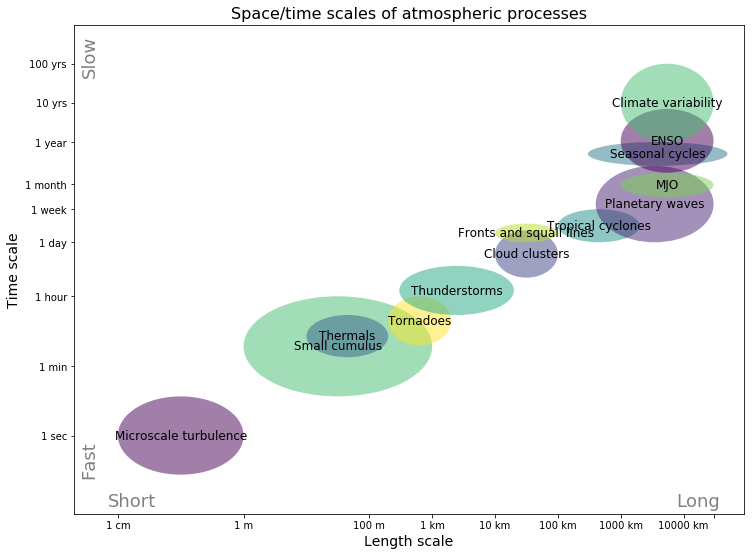

In [7]:
plt.figure(figsize=(12,9))
ax = plt.gca()
xor,yor = 'h','t'; orient=(xor,yor);
patches = []
for k in atmos:
    patches.append( atmos[k].ellipse(orient=orient, log=True) )
p = mpl.collections.PatchCollection( patches, alpha=0.5)
p.set_array( numpy.mod( numpy.arange( len(patches) ), 11/7 ) )
ax.add_collection( p )
for k in atmos:
    atmos[k].text(orient=orient, log=True)
if xor=='h': plt.xticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 100*m, 1*km, 10*km, 100*km, 1000*km, 1e4*km, 3e4*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','100 m','1 km','10 km','100 km','1000 km','10000 km'] )
if yor=='v': plt.yticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 1*km, 10*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','1 km','10 km'] )
if yor=='t': plt.yticks( numpy.log10([1*ms, 1*s, 1*mn, 1*hr, 1*dy, 1*wk, 1*mo, 1*yr, 10*yr, 100*yr]),
                        ['1 ms','1 sec','1 min','1 hour','1 day','1 week','1 month','1 year','10 yrs','100 yrs'] )
plt.title('Space/time scales of atmospheric processes', fontsize=16);
annotate(fastest=10*ms, shortest=2*mm, longest=9e4*km)

In [8]:
print('Ocean equiv. of atmospheric mass %.3fm'%(1e5/(9.8*1025)))
print('Ocean equiv. of atmospheric heat capacity %.3gm'%(1e5*1005/(9.8*1025*3992)))

Ocean equiv. of atmospheric mass 9.955m
Ocean equiv. of atmospheric heat capacity 2.51m


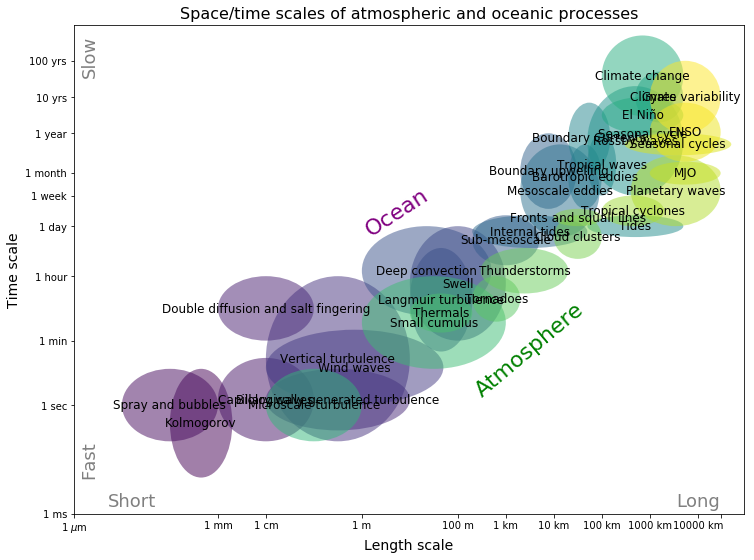

In [9]:
plt.figure(figsize=(12,9))
ax = plt.gca()
xor,yor = 'h','t'; orient=(xor,yor);
patches = []
for k in ocean:
    patches.append( ocean[k].ellipse(orient=orient, log=True) )
for k in atmos:
    patches.append( atmos[k].ellipse(orient=orient, log=True) )
p = mpl.collections.PatchCollection( patches, alpha=0.5)
p.set_array( numpy.arange( len(patches) ) )
ax.add_collection( p )
for k in atmos:
    atmos[k].text(orient=orient, log=True)
for k in ocean:
    ocean[k].text(orient=orient, log=True)

if xor=='h': plt.xticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 100*m, 1*km, 10*km, 100*km, 1000*km, 1e4*km, 3e4*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','100 m','1 km','10 km','100 km','1000 km','10000 km'] )
if yor=='v': plt.yticks( numpy.log10([1*um, 1*mm, 1*cm, 1*m, 1*km, 10*km]),
                        [r'1 $\mu$m','1 mm','1 cm','1 m','1 km','10 km'] )
if yor=='t': plt.yticks( numpy.log10([1*ms, 1*s, 1*mn, 1*hr, 1*dy, 1*wk, 1*mo, 1*yr, 10*yr, 100*yr]),
                        ['1 ms','1 sec','1 min','1 hour','1 day','1 week','1 month','1 year','10 yrs','100 yrs'] )
plt.title('Space/time scales of atmospheric and oceanic processes', fontsize=16);
plt.text(numpy.log10(1*m), numpy.log10(5*dy), 'Ocean', rotation=33, fontsize=22, color='purple');
plt.text(numpy.log10(200*m), numpy.log10(5*mn), 'Atmosphere', rotation=40, fontsize=22, color='green');
annotate(longest=9e4*km)